# Q1. Text Classification

(a) MN Naive Bayes with Smoothing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from wordcloud import WordCloud
from collections import defaultdict
import re

(a) Naive Bayes and Wordcloud

In [3]:
train_data = pd.read_csv('../ML-A2/Corona_train.csv')
cv_data = pd.read_csv('../ML-A2/Corona_validation.csv')

In [4]:
print(train_data)

          ID Sentiment                                        CoronaTweet
0      22979  Positive  I see all kinds of academics already whipping ...
1       9880  Negative  @HenrySmithUK can you raise with Boris please ...
2      35761  Negative  It s a confusing odd time for the shopping pub...
3      37968  Positive  Blog Summary: The Impact of COVID-19 on the Ca...
4      19709   Neutral  ??????? ??????? ???\r\r\nWaiting in a long Que...
...      ...       ...                                                ...
37859  20253   Neutral  DOUBLE TAP ??IF YOU REMEMBER BEING EMPLOYED?\r...
37860  38926  Positive  Struggling to understand why supermarkets or f...
37861  35889  Positive  For anyone interested in the checklist on cons...
37862  40641  Positive  Do you agree with the hypothesis that Indian s...
37863  26063   Neutral  In Richmond, local boutiques and thrift stores...

[37864 rows x 3 columns]


In [5]:
train_data.columns

Index(['ID', 'Sentiment', 'CoronaTweet'], dtype='object')

In [6]:
def ethnicCleansing(tweet, cleanse=True):
    if cleanse:
        tweet = tweet.lower()

        link_pattern = re.compile(r"https?://\S+")
        tweet = link_pattern.sub("", tweet)

        punctn_pattern = re.compile(r"[^A-Za-z ]")
        tweet = punctn_pattern.sub("", tweet)

    tw_words = tweet.split()
    return tw_words

In [7]:
def sentimentClassLabel(sent):
    if sent == "Positive":
        return 1
    elif sent == "Neutral":
        return 0
    elif sent == "Negative":
        return -1
    else:
        return None

train_data['SentimentNB'] = train_data['Sentiment'].map(lambda sent: sentimentClassLabel(sent))
train_data['CoronaTweetNB'] = train_data['CoronaTweet'].map(lambda tweet: ethnicCleansing(tweet))

In [8]:
# now on test data
cv_data['SentimentNB'] = cv_data['Sentiment'].map(lambda sent: sentimentClassLabel(sent))
cv_data['CoronaTweetNB'] = cv_data['CoronaTweet'].map(lambda tweet: ethnicCleansing(tweet))

Without any cleansing on tweet data:

In [9]:
train_data['CoronaTweetStuP'] = train_data['CoronaTweet'].map(lambda tweet: ethnicCleansing(tweet,cleanse=False))
cv_data['CoronaTweetStuP'] = cv_data['CoronaTweet'].map(lambda tweet: ethnicCleansing(tweet,cleanse=False))

In [10]:
# train_data['SentimentNB'].value_counts()
# train_data['Sentiment'].value_counts()
train_data

,ID,Sentiment,CoronaTweet,SentimentNB,CoronaTweetNB,CoronaTweetStuP
0,22979,Positive,I see all kinds of academics already whipping ...,1,"[i, see, all, kinds, of, academics, already, w...","[I, see, all, kinds, of, academics, already, w..."
1,9880,Negative,@HenrySmithUK can you raise with Boris please ...,-1,"[henrysmithuk, can, you, raise, with, boris, p...","[@HenrySmithUK, can, you, raise, with, Boris, ..."
2,35761,Negative,It s a confusing odd time for the shopping pub...,-1,"[it, s, a, confusing, odd, time, for, the, sho...","[It, s, a, confusing, odd, time, for, the, sho..."
3,37968,Positive,Blog Summary: The Impact of COVID-19 on the Ca...,1,"[blog, summary, the, impact, of, covid, on, th...","[Blog, Summary:, The, Impact, of, COVID-19, on..."
4,19709,Neutral,??????? ??????? ???\r\r\nWaiting in a long Que...,0,"[waiting, in, a, long, queue, to, enter, into,...","[???????, ???????, ???, Waiting, in, a, long, ..."
...,...,...,...,...,...,...
37859,20253,Neutral,DOUBLE TAP ??IF YOU REMEMBER BEING EMPLOYED?\r...,0,"[double, tap, if, you, remember, being, employ...","[DOUBLE, TAP, ??IF, YOU, REMEMBER, BEING, EMPL..."
37860,38926,Positive,Struggling to understand why supermarkets or f...,1,"[struggling, to, understand, why, supermarkets...","[Struggling, to, understand, why, supermarkets..."
37861,35889,Positive,For anyone interested in the checklist on cons...,1,"[for, anyone, interested, in, the, checklist, ...","[For, anyone, interested, in, the, checklist, ..."
37862,40641,Positive,Do you agree with the hypothesis that Indian s...,1,"[do, you, agree, with, the, hypothesis, that, ...","[Do, you, agree, with, the, hypothesis, that, ..."


i. Naive Bayes

In [11]:
m_train = len(train_data)
m_cv = len(cv_data)

In [12]:
priors = train_data['SentimentNB'].value_counts().to_dict()

# priors = {sent: c/m for sent,c in priors.items()}
priors = {sent: np.log(c/m_train) for sent,c in priors.items()}   #take log??
priors

{1: -0.824477622571103, -1: -0.9831560652725161, 0: -1.6744695475966687}

In [13]:
# initialize 0 counts for 3 classes by default
word_condn_counts = defaultdict(lambda: {1:0, -1:0, 0:0})
word_net_counts = defaultdict(lambda: 0)
vocab = set()

In [14]:
for row in train_data[['SentimentNB','CoronaTweetStuP']].itertuples(index=False):
    i = row[0]
    tw_words = row[1]
    # print(i)
    # print(tw_words)
    for word in tw_words:
        word_condn_counts[word][i] += 1
        word_net_counts[word] += 1
        vocab.add(word)

In [15]:
# print(word_condn_counts["kinds"])
# print(word_net_counts)

In [16]:
condn_prob = defaultdict(dict)

alpha = 1
v_size = len(vocab)

for i in range(-1,2):
    total_smoothed = sum((word_condn_counts[w][i] + alpha) for w in vocab)
    for word in vocab:
        count_smoothed = word_condn_counts[word][i] + alpha
        condn_prob[word][i] = np.log(count_smoothed/total_smoothed)     #save log(val)

# takes tooo long
#condn_prob

In [17]:
def predict(tw_words):
    pred_class = None
    max_ll = float('-inf')

    for i in range(-1,2):
        ll = priors[i]
        for word in tw_words:
            if word in vocab:
                ll += condn_prob[word][i]
        if ll > max_ll:
            pred_class = i
            max_ll = ll

    return pred_class

In [18]:
train_predict = train_data['CoronaTweetStuP'].map(lambda tw_words: predict(tw_words))
nb_train = np.sum(train_predict == train_data['SentimentNB'])

print("Accuracy on training data = ", end='')
print(nb_train/m_train)

Accuracy on training data = 0.8504648214663004


In [19]:
cv_predict = cv_data['CoronaTweetStuP'].map(lambda tw_words: predict(tw_words))
nb_cv = np.sum(cv_predict == cv_data['SentimentNB'])

print("Accuracy on validation data = ", end='')
print(nb_cv/m_cv)

Accuracy on validation data = 0.6705132098390525


Similarly, for preprocessed tweet data(using 'CoronaTweetNB'), we get:

- Accuracy on training data = 0.8074160152123389
- Accuracy on validation data = 0.6899483753416338

ii. Wordclouds for each class

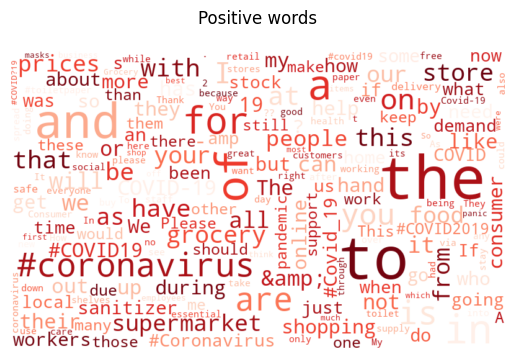

In [20]:
pos_words_str = {w: word_condn_counts[w][1] for w in vocab}
word_cloud_pos = WordCloud(max_font_size=96, background_color = 'white', width = 800, height = 480, colormap="Reds").generate_from_frequencies(pos_words_str)

# def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
#     return "hsl(0, 0%%, %d%%)" % np.random.randint(60, 100)

# word_cloud_pos.recolor(color_func=grey_color_func, random_state=1000)

plt.title("Positive words", pad=20)
plt.imshow(word_cloud_pos, interpolation="bilinear")
plt.axis("off")

plt.savefig("./q1a/q1a_positive_words.png")

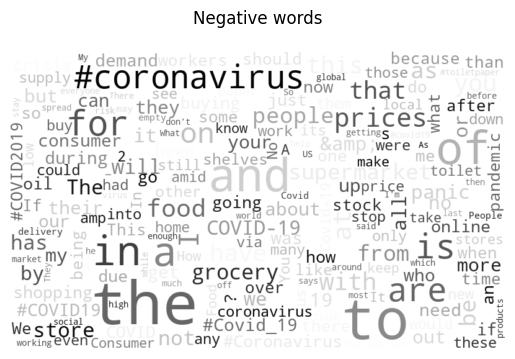

In [21]:
neg_words_str = {w: word_condn_counts[w][-1] for w in vocab}
word_cloud_neg = WordCloud(max_font_size=96, background_color = 'white', width = 800, height = 480, colormap='Greys').generate_from_frequencies(neg_words_str)


plt.title("Negative words", pad=20)
plt.imshow(word_cloud_neg, interpolation="bilinear")
plt.axis("off")

plt.savefig("./q1a/q1a_negative_words.png")

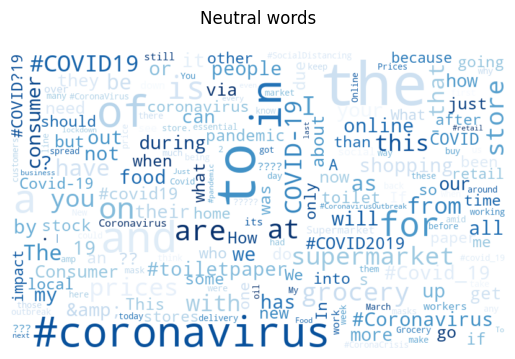

In [22]:
ntr_words_str = {w: word_condn_counts[w][0] for w in vocab}
word_cloud_ntr = WordCloud(max_font_size=96, background_color = 'white', width = 800, height = 480, colormap='Blues').generate_from_frequencies(ntr_words_str)

plt.title("Neutral words", pad=20)
plt.imshow(word_cloud_ntr, interpolation="bilinear")
plt.axis("off")

plt.savefig("./q1a/q1a_neutral_words.png")

(b) Wild guess

In [23]:
random_guess = np.random.randint(-1,2,m_train)
rr = np.mean(random_guess == train_data['SentimentNB'])

print("Accuracy(train) of random guesses = ", rr)

Accuracy(train) of random guesses =  0.33702197337840695


In [24]:
random_guess = np.random.randint(-1,2,m_cv)
rr = np.mean(random_guess == cv_data['SentimentNB'])

print("Accuracy(val) of random guesses = ", rr)

Accuracy(val) of random guesses =  0.33586395384148193


In [25]:
posonly_guess = np.ones(m_train)
rp = np.mean(posonly_guess == train_data['SentimentNB'])

print("Accuracy(train) of positive-only guesses = ", rp)

Accuracy(train) of positive-only guesses =  0.4384639763363617


In [26]:
posonly_guess = np.ones(m_cv)
rp = np.mean(posonly_guess == cv_data['SentimentNB'])

print("Accuracy(val) of positive-only guesses = ", rp)

Accuracy(val) of positive-only guesses =  0.4385059216519891


(c) Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix as cm
import seaborn as sns

# make confmat for train too

In [28]:
#np.count_nonzero(0==cv_data['SentimentNB'])
rg = np.random.randint(-1,2,m_train)
cm0 = cm(rg, train_data['SentimentNB'])

cm1 = cm(random_guess, cv_data['SentimentNB'])

Text(0.5, 14.722222222222216, 'Actual label')

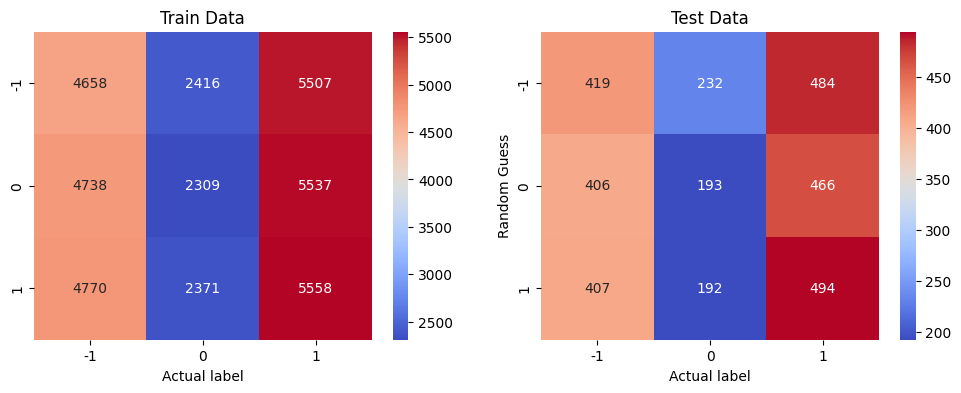

In [29]:
fig_r, ax_r = plt.subplots(1,2, figsize=(12,4))

ax_r[0] = sns.heatmap(cm0, ax=ax_r[0], annot=True, fmt='g', xticklabels=[-1,0,1], yticklabels=[-1,0,1], cmap='coolwarm')
ax_r[1] = sns.heatmap(cm1, ax=ax_r[1], annot=True, fmt='g', xticklabels=[-1,0,1], yticklabels=[-1,0,1], cmap='coolwarm')

ax_r[0].set_title("Train Data")
ax_r[1].set_title("Test Data")

plt.ylabel('Random Guess')

ax_r[0].set_xlabel('Actual label')
ax_r[1].set_xlabel('Actual label')

In [30]:
pg = np.ones(m_train)
cm2 = cm(pg, train_data['SentimentNB'])
cm3 = cm(posonly_guess, cv_data['SentimentNB'])

Text(0.5, 14.722222222222216, 'Actual label')

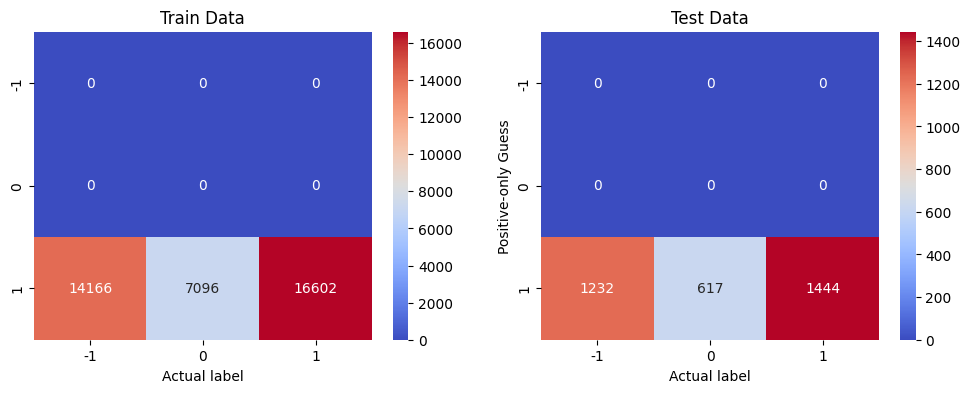

In [31]:
fig_r, ax_r = plt.subplots(1,2, figsize=(12,4))

ax_r[0] = sns.heatmap(cm2, ax=ax_r[0], annot=True, fmt='g', xticklabels=[-1,0,1], yticklabels=[-1,0,1], cmap='coolwarm')
ax_r[1] = sns.heatmap(cm3, ax=ax_r[1], annot=True, fmt='g', xticklabels=[-1,0,1], yticklabels=[-1,0,1], cmap='coolwarm')

ax_r[0].set_title("Train Data")
ax_r[1].set_title("Test Data")

plt.ylabel('Positive-only Guess')

ax_r[0].set_xlabel('Actual label')
ax_r[1].set_xlabel('Actual label')

In [32]:
cm4 = cm(train_predict, train_data['SentimentNB'])
cm5 = cm(cv_predict, cv_data['SentimentNB'])

Text(0.5, 14.722222222222216, 'Actual label')

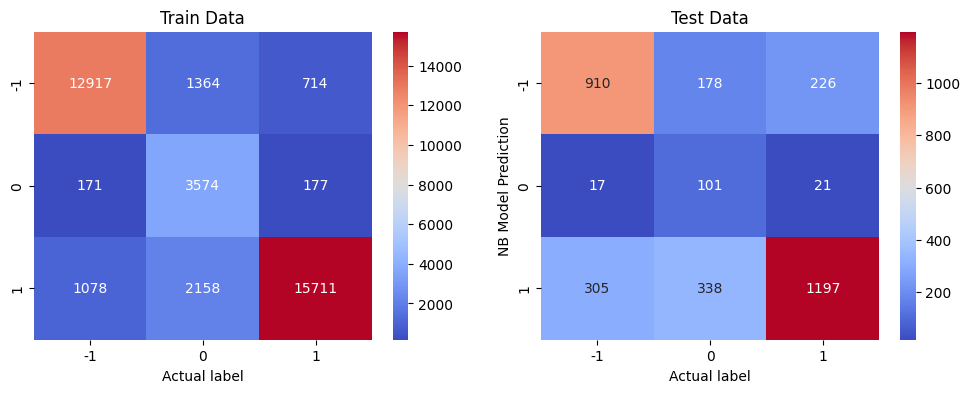

In [33]:
fig_r, ax_r = plt.subplots(1,2, figsize=(12,4))

ax_r[0] = sns.heatmap(cm4, ax=ax_r[0], annot=True, fmt='g', xticklabels=[-1,0,1], yticklabels=[-1,0,1], cmap='coolwarm')
ax_r[1] = sns.heatmap(cm5, ax=ax_r[1], annot=True, fmt='g', xticklabels=[-1,0,1], yticklabels=[-1,0,1], cmap='coolwarm')

ax_r[0].set_title("Train Data")
ax_r[1].set_title("Test Data")

plt.ylabel('NB Model Prediction')

ax_r[0].set_xlabel('Actual label')
ax_r[1].set_xlabel('Actual label')

- In random guessing, none of the categories is dominant as expected(all actual labels are equally split in columns). 
- In positive guessing, all the rows expect row=1 are naturally 0.
- In our model predictions, we see that diagonal entries are dominant(i.e. correctly predicted) except for Neutral labels in test data(may be due to low occurence/prior).

All 6 Confusion matrices have the largest diagonal entry at (1,1), which means Positive is the majority category in correct predictions.

(d) Stemming and Stopword Removal

In [34]:
from wordcloud import STOPWORDS
from nltk.stem import PorterStemmer as pstem

In [35]:
def racialCleansing(tweet, cleanse=True):
    if cleanse:
        tweet = tweet.lower()

        link_pattern = re.compile(r"https?://\S+")
        tweet = link_pattern.sub("", tweet)

        punctn_pattern = re.compile(r"[^A-Za-z ]")
        tweet = punctn_pattern.sub("", tweet)

    tw_words = tweet.split()
    
    tw_imp_words = []
    for word in tw_words:
        if word not in STOPWORDS:
            tw_imp_words.append(pstem().stem(word))

    return tw_imp_words

In [36]:
train_data['CoronaTweetStem'] = train_data['CoronaTweet'].map(lambda tweet: racialCleansing(tweet))
cv_data['CoronaTweetStem'] = cv_data['CoronaTweet'].map(lambda tweet: racialCleansing(tweet))

In [37]:
train_data

,ID,Sentiment,CoronaTweet,SentimentNB,CoronaTweetNB,CoronaTweetStuP,CoronaTweetStem
0,22979,Positive,I see all kinds of academics already whipping ...,1,"[i, see, all, kinds, of, academics, already, w...","[I, see, all, kinds, of, academics, already, w...","[see, kind, academ, alreadi, whip, covid, rela..."
1,9880,Negative,@HenrySmithUK can you raise with Boris please ...,-1,"[henrysmithuk, can, you, raise, with, boris, p...","[@HenrySmithUK, can, you, raise, with, Boris, ...","[henrysmithuk, rais, bori, pleas, supermarket,..."
2,35761,Negative,It s a confusing odd time for the shopping pub...,-1,"[it, s, a, confusing, odd, time, for, the, sho...","[It, s, a, confusing, odd, time, for, the, sho...","[s, confus, odd, time, shop, public, store, cl..."
3,37968,Positive,Blog Summary: The Impact of COVID-19 on the Ca...,1,"[blog, summary, the, impact, of, covid, on, th...","[Blog, Summary:, The, Impact, of, COVID-19, on...","[blog, summari, impact, covid, canadian, resid..."
4,19709,Neutral,??????? ??????? ???\r\r\nWaiting in a long Que...,0,"[waiting, in, a, long, queue, to, enter, into,...","[???????, ???????, ???, Waiting, in, a, long, ...","[wait, long, queue, enter, supermarket, final,..."
...,...,...,...,...,...,...,...
37859,20253,Neutral,DOUBLE TAP ??IF YOU REMEMBER BEING EMPLOYED?\r...,0,"[double, tap, if, you, remember, being, employ...","[DOUBLE, TAP, ??IF, YOU, REMEMBER, BEING, EMPL...","[doubl, tap, rememb, employedfollow, walletgyd..."
37860,38926,Positive,Struggling to understand why supermarkets or f...,1,"[struggling, to, understand, why, supermarkets...","[Struggling, to, understand, why, supermarkets...","[struggl, understand, supermarket, food, shop,..."
37861,35889,Positive,For anyone interested in the checklist on cons...,1,"[for, anyone, interested, in, the, checklist, ...","[For, anyone, interested, in, the, checklist, ...","[anyon, interest, checklist, consum, implic, c..."
37862,40641,Positive,Do you agree with the hypothesis that Indian s...,1,"[do, you, agree, with, the, hypothesis, that, ...","[Do, you, agree, with, the, hypothesis, that, ...","[agre, hypothesi, indian, societi, might, chan..."


In [38]:
word_condn_counts_stem = defaultdict(lambda: {1:0, -1:0, 0:0})
word_net_counts_stem = defaultdict(lambda: 0)
vocab_stem = set()


for row in train_data[['SentimentNB','CoronaTweetStem']].itertuples(index=False):
    i = row[0]
    tw_words = row[1]
    
    for word in tw_words:
        word_condn_counts_stem[word][i] += 1
        word_net_counts_stem[word] += 1
        vocab_stem.add(word)

In [39]:
print(word_condn_counts_stem["kind"])
print(word_net_counts_stem)

{1: 179, -1: 71, 0: 14}
defaultdict(<function <lambda> at 0x0000023A960CA830>, {'see': 1541, 'kind': 264, 'academ': 9, 'alreadi': 437, 'whip': 3, 'covid': 18913, 'relat': 320, 'project': 90, 'cfp': 1, 'syllabi': 1, 'articl': 228, 'blog': 154, 'postsim': 1, 'sittin': 1, 'brows': 15, 'food': 6565, 'left': 366, 'amp': 4548, 'tryin': 1, 'figur': 83, 'go': 3845, 'back': 791, 'groceri': 6125, 'store': 7373, 'appar': 108, 'dont': 1603, 'well': 784, 'pandem': 2798, 'henrysmithuk': 1, 'rais': 363, 'bori': 56, 'pleas': 1461, 'supermarket': 7017, 'control': 277, 'bulkbuy': 15, 'work': 2691, 'shelv': 1211, 'still': 1213, 'empti': 688, 'limit': 568, 'way': 1012, 'high': 661, 'peopl': 5081, 'panick': 79, 'need': 3205, 'eat': 355, 'suppli': 1790, 'combat': 116, 'coronacrisi': 640, 's': 1820, 'confus': 43, 'odd': 28, 'time': 2812, 'shop': 4635, 'public': 653, 'close': 1164, 'flight': 118, 'cancel': 249, 'event': 153, 'postpon': 61, 'help': 2470, 'answer': 182, 'question': 311, 'summari': 18, 'impact':

In [40]:
condn_prob_stem = defaultdict(dict)
alpha = 1

for i in range(-1,2):
    total_smoothed_stem = sum((word_condn_counts_stem[w][i] + alpha) for w in vocab_stem)
    for word in vocab_stem:
        count_smoothed_stem = word_condn_counts_stem[word][i] + alpha
        condn_prob_stem[word][i] = np.log(count_smoothed_stem/total_smoothed_stem)     #save log(val)

In [41]:
def predictStem(tw_words):
    pred_class = None
    max_ll = float('-inf')

    for i in range(-1,2):
        ll = priors[i]
        for word in tw_words:
            if word in vocab_stem:
                ll += condn_prob_stem[word][i]
        if ll > max_ll:
            pred_class = i
            max_ll = ll

    return pred_class

In [42]:
train_predict_stem = train_data['CoronaTweetStem'].map(lambda tw_words: predictStem(tw_words))
nb_train_stem = np.sum(train_predict_stem == train_data['SentimentNB'])

In [43]:
print("New accuracy on training data = ", end='')
print(nb_train_stem/m_train)

New accuracy on training data = 0.7966670188041411


In [44]:
cv_predict_stem = cv_data['CoronaTweetStem'].map(lambda tw_words: predictStem(tw_words))
nb_cv_stem = np.sum(cv_predict_stem == cv_data['SentimentNB'])

print("New accuracy on validation data = ", end='')
print(nb_cv_stem/m_cv)

New accuracy on validation data = 0.6799271181293653


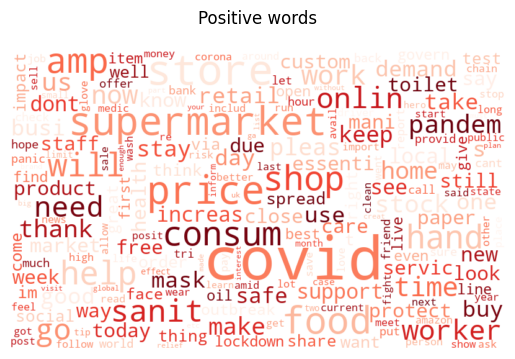

In [45]:
pos_words_str_stem = {w: word_condn_counts_stem[w][1] for w in vocab}
word_cloud_pos = WordCloud(max_font_size=96, background_color = 'white', width = 800, height = 480, colormap='Reds').generate_from_frequencies(pos_words_str_stem)

plt.title("Positive words", pad=20)
plt.imshow(word_cloud_pos, interpolation="bilinear")
plt.axis("off")

plt.savefig("./q1d/q1d_positive_words.png")

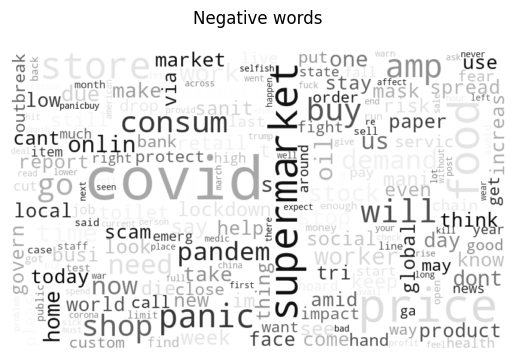

In [46]:
neg_words_str_stem = {w: word_condn_counts_stem[w][-1] for w in vocab}
word_cloud_neg = WordCloud(max_font_size=96, background_color = 'white', width = 800, height = 480, colormap='Greys').generate_from_frequencies(neg_words_str_stem)

plt.title("Negative words", pad=20)
plt.imshow(word_cloud_neg, interpolation="bilinear")
plt.axis("off")

plt.savefig("./q1d/q1d_negative_words.png")

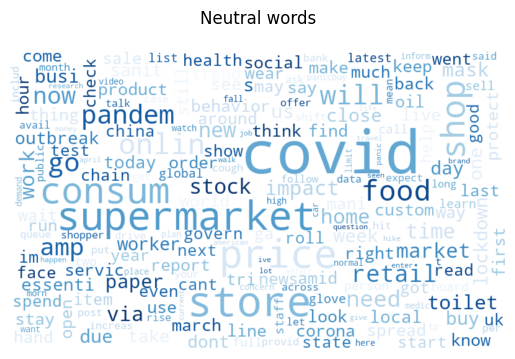

In [47]:
ntr_words_str_stem = {w: word_condn_counts_stem[w][0] for w in vocab}
word_cloud_ntr = WordCloud(max_font_size=96, background_color = 'white', width = 800, height = 480, colormap='Blues').generate_from_frequencies(ntr_words_str_stem)

plt.title("Neutral words", pad=20)
plt.imshow(word_cloud_ntr, interpolation="bilinear")
plt.axis("off")

plt.savefig("./q1d/q1d_neutral_words.png")

(e) Bi-grams

In [48]:
def bigramming(tw_words):
    l = len(tw_words)
    tw_bigrams = []
    for i in range(l-1):
        bg = tw_words[i] + tw_words[i+1]
        tw_bigrams.append(bg)

    return tw_bigrams

In [49]:
# we shall add bigram tuples to vocal_stem itself
train_data['CoronaTweetStemBgm'] = train_data['CoronaTweetStem'].map(lambda tw_words: bigramming(tw_words))
cv_data['CoronaTweetStemBgm'] = cv_data['CoronaTweetStem'].map(lambda tw_words: bigramming(tw_words))

In [50]:
train_data

,ID,Sentiment,CoronaTweet,SentimentNB,CoronaTweetNB,CoronaTweetStuP,CoronaTweetStem,CoronaTweetStemBgm
0,22979,Positive,I see all kinds of academics already whipping ...,1,"[i, see, all, kinds, of, academics, already, w...","[I, see, all, kinds, of, academics, already, w...","[see, kind, academ, alreadi, whip, covid, rela...","[seekind, kindacadem, academalreadi, alreadiwh..."
1,9880,Negative,@HenrySmithUK can you raise with Boris please ...,-1,"[henrysmithuk, can, you, raise, with, boris, p...","[@HenrySmithUK, can, you, raise, with, Boris, ...","[henrysmithuk, rais, bori, pleas, supermarket,...","[henrysmithukrais, raisbori, boripleas, pleass..."
2,35761,Negative,It s a confusing odd time for the shopping pub...,-1,"[it, s, a, confusing, odd, time, for, the, sho...","[It, s, a, confusing, odd, time, for, the, sho...","[s, confus, odd, time, shop, public, store, cl...","[sconfus, confusodd, oddtime, timeshop, shoppu..."
3,37968,Positive,Blog Summary: The Impact of COVID-19 on the Ca...,1,"[blog, summary, the, impact, of, covid, on, th...","[Blog, Summary:, The, Impact, of, COVID-19, on...","[blog, summari, impact, covid, canadian, resid...","[blogsummari, summariimpact, impactcovid, covi..."
4,19709,Neutral,??????? ??????? ???\r\r\nWaiting in a long Que...,0,"[waiting, in, a, long, queue, to, enter, into,...","[???????, ???????, ???, Waiting, in, a, long, ...","[wait, long, queue, enter, supermarket, final,...","[waitlong, longqueue, queueenter, entersuperma..."
...,...,...,...,...,...,...,...,...
37859,20253,Neutral,DOUBLE TAP ??IF YOU REMEMBER BEING EMPLOYED?\r...,0,"[double, tap, if, you, remember, being, employ...","[DOUBLE, TAP, ??IF, YOU, REMEMBER, BEING, EMPL...","[doubl, tap, rememb, employedfollow, walletgyd...","[doubltap, taprememb, remembemployedfollow, em..."
37860,38926,Positive,Struggling to understand why supermarkets or f...,1,"[struggling, to, understand, why, supermarkets...","[Struggling, to, understand, why, supermarkets...","[struggl, understand, supermarket, food, shop,...","[strugglunderstand, understandsupermarket, sup..."
37861,35889,Positive,For anyone interested in the checklist on cons...,1,"[for, anyone, interested, in, the, checklist, ...","[For, anyone, interested, in, the, checklist, ...","[anyon, interest, checklist, consum, implic, c...","[anyoninterest, interestchecklist, checklistco..."
37862,40641,Positive,Do you agree with the hypothesis that Indian s...,1,"[do, you, agree, with, the, hypothesis, that, ...","[Do, you, agree, with, the, hypothesis, that, ...","[agre, hypothesi, indian, societi, might, chan...","[agrehypothesi, hypothesiindian, indiansocieti..."


In [51]:
for row in train_data[['SentimentNB','CoronaTweetStemBgm']].itertuples(index=False):
    i = row[0]
    tw_bigrams = row[1]
    
    for bg in tw_bigrams:
        word_condn_counts_stem[bg][i] += 1
        word_net_counts_stem[bg] += 1
        vocab_stem.add(bg)

In [52]:
print(word_condn_counts_stem["seekind"])

{1: 1, -1: 2, 0: 0}


In [53]:
condn_prob_stem_bg = defaultdict(dict)
alpha = 1

for i in range(-1,2):
    total_smoothed_stem = sum((word_condn_counts_stem[w][i] + alpha) for w in vocab_stem)
    for word in vocab_stem:
        count_smoothed_stem = word_condn_counts_stem[word][i] + alpha
        condn_prob_stem_bg[word][i] = np.log(count_smoothed_stem/total_smoothed_stem)     #save log(val)

In [54]:
def predictStemBigram(tw_words,tw_bigrams):
    pred_class = None
    max_ll = float('-inf')

    for i in range(-1,2):
        ll = priors[i]
        for word in tw_words:
            if word in vocab_stem:
                ll += condn_prob_stem_bg[word][i]
        for bg in tw_bigrams:
            if bg in vocab_stem:
                ll += condn_prob_stem_bg[bg][i]
        if ll > max_ll:
            pred_class = i
            max_ll = ll

    return pred_class

In [55]:
train_predict_stem_bg = train_data.apply(lambda x: predictStemBigram(x['CoronaTweetStem'],x['CoronaTweetStemBgm']), axis=1)
nb_train_stem_bg = np.sum(train_predict_stem_bg == train_data['SentimentNB'])

In [56]:
print("Bigramming accuracy on training data = ", end='')
print(nb_train_stem_bg/m_train)

Bigramming accuracy on training data = 0.9356380731037397


In [57]:
cv_predict_stem_bg = cv_data.apply(lambda x: predictStemBigram(x['CoronaTweetStem'],x['CoronaTweetStemBgm']), axis=1)
nb_cv_stem_bg = np.sum(cv_predict_stem_bg == cv_data['SentimentNB'])

print("Bigramming accuracy on validation data = ", end='')
print(nb_cv_stem_bg/m_cv)

Bigramming accuracy on validation data = 0.6629213483146067


It seems that Bigrams coupled with stemmed vocabulary is overfitting the training data, as accuracy goes from around 80% to 94%. While accuracy on validation set stays the same, if not decreased slightly.

Let's add trigrams instead (forget sunk cost fallacy).

In [58]:
def trigramming(tw_words):
    l = len(tw_words)
    tw_trigrams = []
    for i in range(l-2):
        tg = tw_words[i] + tw_words[i+1] + tw_words[i+2]
        tw_trigrams.append(tg)

    return tw_trigrams

In [59]:
train_data['CoronaTweetStemTgm'] = train_data['CoronaTweetStem'].map(lambda tw_words: trigramming(tw_words))
cv_data['CoronaTweetStemTgm'] = cv_data['CoronaTweetStem'].map(lambda tw_words: trigramming(tw_words))


for row in train_data[['SentimentNB','CoronaTweetStemTgm']].itertuples(index=False):
    i = row[0]
    tw_trigrams = row[1]
    
    for tg in tw_trigrams:
        word_condn_counts_stem[tg][i] += 1
        word_net_counts_stem[tg] += 1
        vocab_stem.add(tg)

condn_prob_stem_tg = defaultdict(dict)
alpha = 1

for i in range(-1,2):
    total_smoothed_stem = sum((word_condn_counts_stem[w][i] + alpha) for w in vocab_stem)
    for word in vocab_stem:
        count_smoothed_stem = word_condn_counts_stem[word][i] + alpha
        condn_prob_stem_tg[word][i] = np.log(count_smoothed_stem/total_smoothed_stem)     #save log(val)

In [60]:
def predictStemTrigram(tw_words,tw_bigrams,tw_trigrams):
    pred_class = None
    max_ll = float('-inf')

    for i in range(-1,2):
        ll = priors[i]
        for word in tw_words:
            if word in vocab_stem:
                ll += condn_prob_stem_tg[word][i]
        for bg in tw_bigrams:
            if bg in vocab_stem:
                ll += condn_prob_stem_tg[bg][i]
        for tg in tw_trigrams:
            if tg in vocab_stem:
                ll += condn_prob_stem_tg[tg][i]
        if ll > max_ll:
            pred_class = i
            max_ll = ll

    return pred_class

In [61]:
train_predict_stem_tg = train_data.apply(lambda x: predictStemTrigram(x['CoronaTweetStem'],x['CoronaTweetStemBgm'],x['CoronaTweetStemTgm']), axis=1)
nb_train_stem_tg = np.sum(train_predict_stem_tg == train_data['SentimentNB'])

print("Trigramming accuracy on training data = ", end='')
print(nb_train_stem_tg/m_train)

cv_predict_stem_tg = cv_data.apply(lambda x: predictStemTrigram(x['CoronaTweetStem'],x['CoronaTweetStemBgm'],x['CoronaTweetStemTgm']), axis=1)
nb_cv_stem_tg = np.sum(cv_predict_stem_tg == cv_data['SentimentNB'])

print("Trigramming accuracy on training data = ", end='')
print(nb_cv_stem_tg/m_cv)

Trigramming accuracy on training data = 0.9801922670610607
Trigramming accuracy on training data = 0.6604919526267841


Let us try a different feature. Since hashtags are like labels for a tweet, we can use them as special words(and assign higher weights). We can also try this for twitter handles, thus giving (hyperparametrizing) k=2 times weight to these words. 

In [84]:
def racialCleansing(tweet, cleanse=True, hashup=False):
    if cleanse:
        tweet = tweet.lower()

        link_pattern = re.compile(r"https?://\S+")
        tweet = link_pattern.sub("", tweet)

        if hashup:
            hashdle_pattern = re.compile(r"[#@]{1}[A-Za-z]+")
            tweet = re.sub(hashdle_pattern ,lambda m: (m.group(0)+' ')*2, tweet)
            # tweet = re.sub(hashdle_pattern ,lambda m: (re.sub(r"[#@]{1}",'',m.group(0))+' ')*5, tweet)

            punctn_pattern = re.compile(r"[^A-Za-z #@]")
            tweet = punctn_pattern.sub("", tweet)

        else:
            punctn_pattern = re.compile(r"[^A-Za-z ]")
            tweet = punctn_pattern.sub("", tweet)

    tw_words = tweet.split()
    
    tw_imp_words = []
    for word in tw_words:
        if word not in STOPWORDS:
            tw_imp_words.append(pstem().stem(word))

    return tw_imp_words

In [85]:
racialCleansing("I am testing -=- !da #code #code @hejda",cleanse=True,hashup=True)

['test', 'da', '#code', '#code', '#code', '#code', '@hejda', '@hejda']

In [86]:
twz = "asa #code @bhelsa!"

hashdle_pattern = re.compile(r"[#@]{1}[A-Za-z]+")
re.sub(hashdle_pattern ,lambda m: (re.sub(r"[#@]{1}",'',m.group(0))+' ')*5, twz)

'asa code code code code code  bhelsa bhelsa bhelsa bhelsa bhelsa !'

In [87]:
train_data['CoronaTweetStemHash'] = train_data['CoronaTweet'].map(lambda tweet: racialCleansing(tweet,True,True))
cv_data['CoronaTweetStemHash'] = cv_data['CoronaTweet'].map(lambda tweet: racialCleansing(tweet,True,True))

In [88]:
train_data

,ID,Sentiment,CoronaTweet,SentimentNB,CoronaTweetNB,CoronaTweetStuP,CoronaTweetStem,CoronaTweetStemBgm,CoronaTweetStemTgm,CoronaTweetStemHash
0,22979,Positive,I see all kinds of academics already whipping ...,1,"[i, see, all, kinds, of, academics, already, w...","[I, see, all, kinds, of, academics, already, w...","[see, kind, academ, alreadi, whip, covid, rela...","[seekind, kindacadem, academalreadi, alreadiwh...","[seekindacadem, kindacademalreadi, academalrea...","[see, kind, academ, alreadi, whip, #covid, #co..."
1,9880,Negative,@HenrySmithUK can you raise with Boris please ...,-1,"[henrysmithuk, can, you, raise, with, boris, p...","[@HenrySmithUK, can, you, raise, with, Boris, ...","[henrysmithuk, rais, bori, pleas, supermarket,...","[henrysmithukrais, raisbori, boripleas, pleass...","[henrysmithukraisbori, raisboripleas, boriplea...","[@henrysmithuk, @henrysmithuk, rais, bori, ple..."
2,35761,Negative,It s a confusing odd time for the shopping pub...,-1,"[it, s, a, confusing, odd, time, for, the, sho...","[It, s, a, confusing, odd, time, for, the, sho...","[s, confus, odd, time, shop, public, store, cl...","[sconfus, confusodd, oddtime, timeshop, shoppu...","[sconfusodd, confusoddtime, oddtimeshop, times...","[s, confus, odd, time, shop, public, store, cl..."
3,37968,Positive,Blog Summary: The Impact of COVID-19 on the Ca...,1,"[blog, summary, the, impact, of, covid, on, th...","[Blog, Summary:, The, Impact, of, COVID-19, on...","[blog, summari, impact, covid, canadian, resid...","[blogsummari, summariimpact, impactcovid, covi...","[blogsummariimpact, summariimpactcovid, impact...","[blog, summari, impact, covid, canadian, resid..."
4,19709,Neutral,??????? ??????? ???\r\r\nWaiting in a long Que...,0,"[waiting, in, a, long, queue, to, enter, into,...","[???????, ???????, ???, Waiting, in, a, long, ...","[wait, long, queue, enter, supermarket, final,...","[waitlong, longqueue, queueenter, entersuperma...","[waitlongqueue, longqueueenter, queueentersupe...","[wait, long, queue, enter, supermarket, final,..."
...,...,...,...,...,...,...,...,...,...,...
37859,20253,Neutral,DOUBLE TAP ??IF YOU REMEMBER BEING EMPLOYED?\r...,0,"[double, tap, if, you, remember, being, employ...","[DOUBLE, TAP, ??IF, YOU, REMEMBER, BEING, EMPL...","[doubl, tap, rememb, employedfollow, walletgyd...","[doubltap, taprememb, remembemployedfollow, em...","[doubltaprememb, tapremembemployedfollow, reme...","[doubl, tap, rememb, employedfollow, @walletgy..."
37860,38926,Positive,Struggling to understand why supermarkets or f...,1,"[struggling, to, understand, why, supermarkets...","[Struggling, to, understand, why, supermarkets...","[struggl, understand, supermarket, food, shop,...","[strugglunderstand, understandsupermarket, sup...","[strugglunderstandsupermarket, understandsuper...","[struggl, understand, supermarket, food, shop,..."
37861,35889,Positive,For anyone interested in the checklist on cons...,1,"[for, anyone, interested, in, the, checklist, ...","[For, anyone, interested, in, the, checklist, ...","[anyon, interest, checklist, consum, implic, c...","[anyoninterest, interestchecklist, checklistco...","[anyoninterestchecklist, interestchecklistcons...","[anyon, interest, checklist, consum, implic, c..."
37862,40641,Positive,Do you agree with the hypothesis that Indian s...,1,"[do, you, agree, with, the, hypothesis, that, ...","[Do, you, agree, with, the, hypothesis, that, ...","[agre, hypothesi, indian, societi, might, chan...","[agrehypothesi, hypothesiindian, indiansocieti...","[agrehypothesiindian, hypothesiindiansocieti, ...","[agre, hypothesi, indian, societi, might, chan..."


In [89]:
word_condn_counts_stem = defaultdict(lambda: {1:0, -1:0, 0:0})
word_net_counts_stem = defaultdict(lambda: 0)
vocab_stem = set()


for row in train_data[['SentimentNB','CoronaTweetStemHash']].itertuples(index=False):
    i = row[0]
    tw_words = row[1]
    
    for word in tw_words:
        word_condn_counts_stem[word][i] += 1
        word_net_counts_stem[word] += 1
        vocab_stem.add(word)


for row in train_data[['SentimentNB','CoronaTweetStemBgm']].itertuples(index=False):
    i = row[0]
    tw_bigrams = row[1]
    
    for bg in tw_bigrams:
        word_condn_counts_stem[bg][i] += 1
        word_net_counts_stem[bg] += 1
        vocab_stem.add(bg)

condn_prob_stem_bg = defaultdict(dict)
alpha = 1

for i in range(-1,2):
    total_smoothed_stem = sum((word_condn_counts_stem[w][i] + alpha) for w in vocab_stem)
    for word in vocab_stem:
        count_smoothed_stem = word_condn_counts_stem[word][i] + alpha
        condn_prob_stem_bg[word][i] = np.log(count_smoothed_stem/total_smoothed_stem)     #save log(val)

In [90]:
def predictStemBigram(tw_words,tw_bigrams):
    pred_class = None
    max_ll = float('-inf')

    for i in range(-1,2):
        ll = priors[i]
        for word in tw_words:
            if word in vocab_stem:
                ll += condn_prob_stem_bg[word][i]
        for bg in tw_bigrams:
            if bg in vocab_stem:
                ll += condn_prob_stem_bg[bg][i]
        if ll > max_ll:
            pred_class = i
            max_ll = ll

    return pred_class

In [91]:
# just replaced original text by hashed column (kept bigram column same)

train_predict_stem_hash = train_data.apply(lambda x: predictStemBigram(x['CoronaTweetStemHash'],x['CoronaTweetStemBgm']), axis=1)
nb_train_stem_hash = np.sum(train_predict_stem_hash == train_data['SentimentNB'])

print("Hashup accuracy on training data = ", end='')
print(nb_train_stem_hash/m_train)

Hashup accuracy on training data = 0.9357965349672512


In [92]:

cv_predict_stem_hash = cv_data.apply(lambda x: predictStemBigram(x['CoronaTweetStemHash'],x['CoronaTweetStemBgm']), axis=1)
nb_cv_stem_hash = np.sum(cv_predict_stem_hash == cv_data['SentimentNB'])

print("Hashup accuracy on training data = ", end='')
print(nb_cv_stem_hash/m_cv)

Trigramming accuracy on training data = 0.6595809292438506


This doesn't seem to work either. Maybe more insight is needed on the data.

(f) Domain Adaptation

In [93]:
def domainExpansion(vocab_stem, word_condn_counts_stem, word_net_counts_stem, target_path="../ML-A2/Domain_Adaptation/Twitter_train_1.csv", take_source=True, merge_priors=True):
    target_data = pd.read_csv(target_path)
    m_target = len(target_data)

    target_data['SentimentNB'] = target_data['Sentiment'].map(lambda sent: sentimentClassLabel(sent))
    target_data['TweetStem'] = target_data['Tweet'].map(lambda tweet: racialCleansing(tweet))

    # wb priors??
    # do I merge vocab with sourcee 
    if take_source:
        priors1 = train_data['SentimentNB'].value_counts().to_dict()
        priors2 = target_data['SentimentNB'].value_counts().to_dict()

        if merge_priors:
            priors = {sent: priors1[sent]+priors2[sent] for sent in range(-1,2)}
            priors = {sent: np.log(c/(m_train+m_target)) for sent,c in priors.items()}
            print(priors)
        else:
            priors = {sent: np.log(c/(m_target)) for sent,c in priors2.items()}
            print('w',priors)

    else:
        word_condn_counts_stem = defaultdict(lambda: {1:0, -1:0, 0:0})
        word_net_counts_stem = defaultdict(lambda: 0)
        vocab_stem = set()

        priors = target_data['SentimentNB'].value_counts().to_dict()
        priors = {sent: np.log(c/(m_target)) for sent,c in priors.items()}


    # word_condn_counts_stem = defaultdict(lambda: {1:0, -1:0, 0:0})
    # word_net_counts_stem = defaultdict(lambda: 0)
    # vocab_stem = set()

    for row in target_data[['SentimentNB','TweetStem']].itertuples(index=False):
        i = row[0]
        tw_tar_words = row[1]
        
        for word in tw_tar_words:
            word_condn_counts_stem[word][i] += 1
            word_net_counts_stem[word] += 1
            vocab_stem.add(word)


    condn_prob_stem = defaultdict(dict)
    alpha = 1

    for i in range(-1,2):
        total_smoothed_stem = sum((word_condn_counts_stem[w][i] + alpha) for w in vocab_stem)
        for word in vocab_stem:
            count_smoothed_stem = word_condn_counts_stem[word][i] + alpha
            condn_prob_stem[word][i] = np.log(count_smoothed_stem/total_smoothed_stem)

    return priors, vocab_stem, condn_prob_stem

In [94]:
def predictStemTarget(tw_words, priors_i, vocab_stem_i, condn_prob_stem_i):
    pred_class = None
    max_ll = float('-inf')

    for i in range(-1,2):
        ll = priors_i[i]
        for word in tw_words:
            if word in vocab_stem_i:
                ll += condn_prob_stem_i[word][i]
        if ll > max_ll:
            pred_class = i
            max_ll = ll

    return pred_class

In [95]:
val_data = pd.read_csv("../ML-A2/Domain_Adaptation/Twitter_validation.csv")
m_val = len(val_data)

val_data['SentimentNB'] = val_data['Sentiment'].map(lambda sent: sentimentClassLabel(sent))
val_data['TweetStem'] = val_data['Tweet'].map(lambda tweet: racialCleansing(tweet))

val_data

,ID,Sentiment,Tweet,SentimentNB,TweetStem
0,72835,Neutral,Pretty excited about this collaboration with K...,0,"[pretti, excit, collabor, kovaak, experiment, ..."
1,72836,Neutral,Pretty is excited to collaborate with KovaaK 2...,0,"[pretti, excit, collabor, kovaak, mode, resear..."
2,72837,Neutral,Pretty excited about this collaboration with K...,0,"[pretti, excit, collabor, kovaak, experi, mode..."
3,72838,Neutral,Pretty excited everybody about this upcoming c...,0,"[pretti, excit, everybodi, upcom, collabor, ko..."
4,72839,Neutral,Pretty excited about the collaboration with Ko...,0,"[pretti, excit, collabor, kovaak, studio, expe..."
...,...,...,...,...,...
3013,990,Positive,Tom Clancy's Rainbow Six Siege is a great game...,1,"[tom, clanci, rainbow, six, sieg, great, game,..."
3014,992,Positive,guess i'll broke.,1,"[guess, ill, broke]"
3015,994,Positive,Good on Sony. As much as I want to see the new...,1,"[good, soni, much, want, see, new, ps, what, g..."
3016,997,Positive,Today sucked so it’s time to drink wine n play...,1,"[today, suck, time, drink, wine, n, play, bord..."


In [96]:
priors_1, vocab_stem_1, condn_prob_stem_1 = domainExpansion(vocab_stem, word_condn_counts_stem, word_net_counts_stem, "../ML-A2/Domain_Adaptation/Twitter_train_1.csv")

{-1: -0.9835864220762957, 0: -1.671401753327428, 1: -0.8254241835959168}


In [97]:
val_predict_stem = val_data['TweetStem'].map(lambda tw_words: predictStemTarget(tw_words,priors_1,vocab_stem_1,condn_prob_stem_1))
nb_val_stem = np.sum(val_predict_stem == val_data['SentimentNB'])

print("Accuracy on validation data = ", end='')
print(nb_val_stem/m_val)

Accuracy on validation data = 0.41385023194168324


In [98]:
priors_1w, vocab_stem_1w, condn_prob_stem_1w = domainExpansion(vocab_stem, word_condn_counts_stem, word_net_counts_stem, "../ML-A2/Domain_Adaptation/Twitter_train_1.csv",take_source=False)

In [99]:
val_predict_stemw = val_data['TweetStem'].map(lambda tw_words: predictStemTarget(tw_words,priors_1w,vocab_stem_1w,condn_prob_stem_1w))
nb_val_stemw = np.sum(val_predict_stemw == val_data['SentimentNB'])

print("Accuracy on validation data = ", end='')
print(nb_val_stemw/m_val)

Accuracy on validation data = 0.3717693836978131


We can see that there is a significant increase in accuracy when taking source data in training. 

Let's make another sequence of predictions except we only use priors generated on target domain. It makes sense since we already know that the data in the test set belongs to the target domain.

In [100]:
priors_1np, vocab_stem_1np, condn_prob_stem_1np = domainExpansion(vocab_stem, word_condn_counts_stem, word_net_counts_stem, "../ML-A2/Domain_Adaptation/Twitter_train_1.csv",take_source=True,merge_priors=False)

w {0: -1.0986122886681098, -1: -1.0986122886681098, 1: -1.0986122886681098}


In [108]:
val_predict_stemnp = val_data['TweetStem'].map(lambda tw_words: predictStemTarget(tw_words,priors_1np,vocab_stem_1np,condn_prob_stem_1np))
nb_val_stemnp = np.sum(val_predict_stemnp == val_data['SentimentNB'])

print("Accuracy on validation data = ", end='')
print(nb_val_stemnp/m_val)

Accuracy on validation data = 0.41119946984758116


There doesn't seem to be much improvement when doing this. Let's check for all target train sizes.

In [109]:
val_accu_list = [nb_val_stem/m_val]
val_accuw_list = [nb_val_stemw/m_val]
val_accunp_list = [nb_val_stemnp/m_val]

In [112]:
for i in [2,5,10,25,50,100]:
    print(i, "start")

    priors_i, vocab_stem_i, condn_prob_stem_i = domainExpansion(vocab_stem, word_condn_counts_stem, word_net_counts_stem, f"../ML-A2/Domain_Adaptation/Twitter_train_{i}.csv")
    val_predict_stem = val_data['TweetStem'].map(lambda tw_words: predictStemTarget(tw_words,priors_i,vocab_stem_i,condn_prob_stem_i))
    nb_val_stem = np.sum(val_predict_stem == val_data['SentimentNB'])

    val_accu_list.append(nb_val_stem/m_val)


    priors_iw, vocab_stem_iw, condn_prob_stem_iw = domainExpansion(vocab_stem, word_condn_counts_stem, word_net_counts_stem, f"../ML-A2/Domain_Adaptation/Twitter_train_{i}.csv",take_source=False)
    val_predict_stemw = val_data['TweetStem'].map(lambda tw_words: predictStemTarget(tw_words,priors_iw,vocab_stem_iw,condn_prob_stem_iw))
    nb_val_stemw = np.sum(val_predict_stemw == val_data['SentimentNB'])

    val_accuw_list.append(nb_val_stemw/m_val)


    priors_inp, vocab_stem_inp, condn_prob_stem_inp = domainExpansion(vocab_stem, word_condn_counts_stem, word_net_counts_stem, f"../ML-A2/Domain_Adaptation/Twitter_train_{i}.csv",take_source=True,merge_priors=False)
    val_predict_stemnp = val_data['TweetStem'].map(lambda tw_words: predictStemTarget(tw_words,priors_inp,vocab_stem_inp,condn_prob_stem_inp))
    nb_val_stemnp = np.sum(val_predict_stemnp == val_data['SentimentNB'])

    val_accunp_list.append(nb_val_stemnp/m_val)


2 start
{-1: -0.9840135790337531, 0: -1.668367346801313, 1: -0.8263641901585618}
w {0: -1.0986122886681098, -1: -1.0986122886681098, 1: -1.0986122886681098}
5 start
{-1: -0.9852762041476428, 0: -1.6594589576161494, 1: -0.8291455608968549}
w {0: -1.0986122886681098, -1: -1.0986122886681098, 1: -1.0986122886681098}
10 start
{-1: -0.9873198033651313, 0: -1.6452299000866997, 1: -0.8336562773029755}
w {0: -1.0986122886681098, -1: -1.0986122886681098, 1: -1.0986122886681098}
25 start
{-1: -0.9930307180003248, 0: -1.6066542669430293, 1: -0.8463211023453665}
w {0: -1.0986122886681098, -1: -1.0986122886681098, 1: -1.0986122886681098}
50 start
{-1: -1.001348122993069, 0: -1.553372493975636, 1: -0.8649257973405382}
w {0: -1.0986122886681098, -1: -1.0986122886681098, 1: -1.0986122886681098}
100 start
{-1: -1.0145847019769425, 0: -1.4748477584613358, 1: -0.8949366749022305}
w {0: -1.0986122886681098, -1: -1.0986122886681098, 1: -1.0986122886681098}


In [113]:
print(val_accu_list)
print(val_accuw_list)
print(val_accunp_list)

[0.41385023194168324, 0.4178263750828363, 0.42213386348575216, 0.4370444002650762, 0.4638833664678595, 0.49569251159708416, 0.5106030483764082]
[0.3717693836978131, 0.38469184890656066, 0.41285619615639496, 0.43870112657389, 0.4579191517561299, 0.4937044400265076, 0.5172299536116634]
[0.41119946984758116, 0.4131875414181577, 0.4161696487740225, 0.44002650762094103, 0.46819085487077533, 0.48575215374420144, 0.49569251159708416]


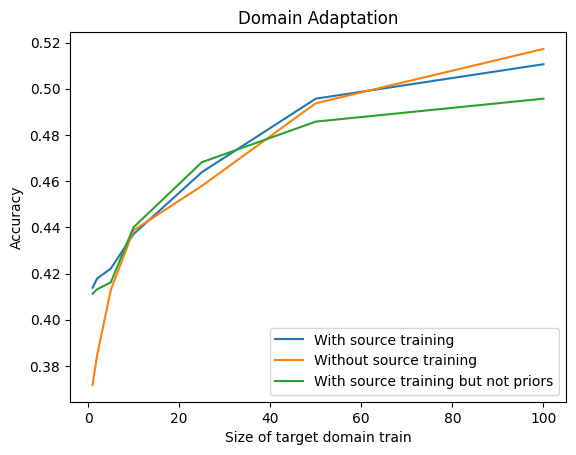

In [114]:
sizes = [1,2,5,10,25,50,100]

  
plt.plot(sizes, val_accu_list, label="With source training")
plt.plot(sizes, val_accuw_list, label="Without source training")
plt.plot(sizes, val_accunp_list, label="With source training but not priors")
  
# plt.xticks(X_axis, X) 
plt.xlabel("Size of target domain train") 
plt.ylabel("Accuracy") 
plt.title("Domain Adaptation") 
plt.legend() 
plt.show() 

It seems there is no visible benefit to changing priors. Focusing on Domain Adaptation:

- We get a significant increase with source training at smaller sizes (this is because the model hasn't leearned much on the smaller sized target training data).
- Only for size=100%, the model without source training performs better.